# Feature Importance Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## Import Data

In [2]:
no_outliers_clean_data = pd.read_csv('../data/data_ohe_outliers_drop_cols.csv')

print(no_outliers_clean_data.shape)
no_outliers_clean_data.head()

(4917, 118)


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,name_processed,assumed_gender,...,neighbourhood_Victory Heights,neighbourhood_View Ridge,neighbourhood_Wallingford,neighbourhood_Wedgwood,neighbourhood_West Queen Anne,neighbourhood_West Woodland,neighbourhood_Westlake,neighbourhood_Whittier Heights,neighbourhood_Windermere,neighbourhood_Yesler Terrace
0,47.60096,-122.30190,53.0,30.0,99.0,0.80,247,4,jimi hendrix neighborhood 3,1,...,0,0,0,0,0,0,0,0,0,0
1,47.65444,-122.33629,99.0,30.0,159.0,0.95,99,2,fab privat seattl urban cottag,1,...,0,0,1,0,0,0,0,0,0,0
2,47.52383,-122.35287,70.0,2.0,238.0,1.95,206,27,entir guest suit inest seattl,0,...,0,0,0,0,0,0,0,0,0,0
3,47.55017,-122.31937,55.0,2.0,175.0,1.14,356,20,gloriou sun room memori foamb,0,...,0,0,0,0,0,0,0,0,0,0
4,47.66133,-122.40088,61.0,1.0,307.0,2.28,209,53,seren room sunni cottag near discoveri park,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
scaled_clean_data = pd.read_csv('../data/scaled_data.csv')

print(scaled_clean_data.shape)
scaled_clean_data.head()

(4917, 120)


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,name_processed,assumed_gender,...,neighbourhood_Wallingford,neighbourhood_Wedgwood,neighbourhood_West Queen Anne,neighbourhood_West Woodland,neighbourhood_Westlake,neighbourhood_Whittier Heights,neighbourhood_Windermere,neighbourhood_Yesler Terrace,location_proximity,price_log
0,-0.495775,0.945155,53.0,2.552816,0.322248,0.80,247,4,jimi hendrix neighborhood 3,1,...,0,0,0,0,0,0,0,0,0.694221,3.970292
1,0.553648,-0.054648,99.0,2.552816,1.019036,0.95,99,2,fab privat seattl urban cottag,1,...,1,0,0,0,0,0,0,0,-0.529941,4.595120
2,-2.009275,-0.536670,70.0,-0.412954,1.936474,1.95,206,27,entir guest suit inest seattl,0,...,0,0,0,0,0,0,0,0,1.743476,4.248495
3,-1.492412,0.437259,55.0,-0.412954,1.204847,1.14,356,20,gloriou sun room memori foamb,0,...,0,0,0,0,0,0,0,0,1.499551,4.007333
4,0.688848,-1.932440,61.0,-0.518874,2.737780,2.28,209,53,seren room sunni cottag near discoveri park,1,...,0,0,0,0,0,0,0,0,-1.116814,4.110874


## Random Forests and Gradient Boosting Algorithms

#### Not Scaled Data

In [4]:
# for clean data (with no outliers and encoded categorical columns) and all columns
# drop columns with neighbourhood_group in order not to repeat with neighbourhood columns in feature importance lists
neighbourhood_group_cols = no_outliers_clean_data.filter(like = "neighbourhood_group").columns
no_outliers_clean_data.drop(columns = neighbourhood_group_cols, inplace = True)

X = no_outliers_clean_data.drop(['availability_365', 'name_processed', ], axis = 1)
y = no_outliers_clean_data['availability_365']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
# Random Forests model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
# Gradient Boosting model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [8]:
# Get feature importances from both models
rf_importances = rf.feature_importances_
gb_importances = gb.feature_importances_

In [9]:
# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({"Feature": X.columns,
                                    "Random Forest Importances": rf_importances,
                                    "Gradient Boosting Importances": gb_importances})

In [10]:
# Sort the DataFrame by Random Forest Importance scores
feature_importances_RF = feature_importances

feature_importances_RF = feature_importances_RF.sort_values(by = "Random Forest Importances", ascending = False)

feature_importances_RF.drop(['Gradient Boosting Importances'], axis = 1).head(15)

,Feature,Random Forest Importances
8,total_of_host_listings_count,0.159510
2,price,0.118036
5,reviews_per_month,0.117956
0,latitude,0.114440
1,longitude,0.111854
4,number_of_reviews,0.082664
6,number_of_reviews_ltm,0.068345
3,minimum_nights,0.042957
7,assumed_gender,0.020936
88,neighbourhood_University District,0.010784


In [11]:
# Sort the DataFrame by Gradient Boosting Importance scores
feature_importances_GB = feature_importances

feature_importances_GB = feature_importances_GB.sort_values(by = "Gradient Boosting Importances", ascending = False)

feature_importances_GB.drop(['Random Forest Importances'], axis = 1).head(15)

,Feature,Gradient Boosting Importances
8,total_of_host_listings_count,0.409823
5,reviews_per_month,0.108443
2,price,0.107811
1,longitude,0.055728
0,latitude,0.054782
4,number_of_reviews,0.044010
7,assumed_gender,0.035073
3,minimum_nights,0.032870
6,number_of_reviews_ltm,0.025594
88,neighbourhood_University District,0.019187


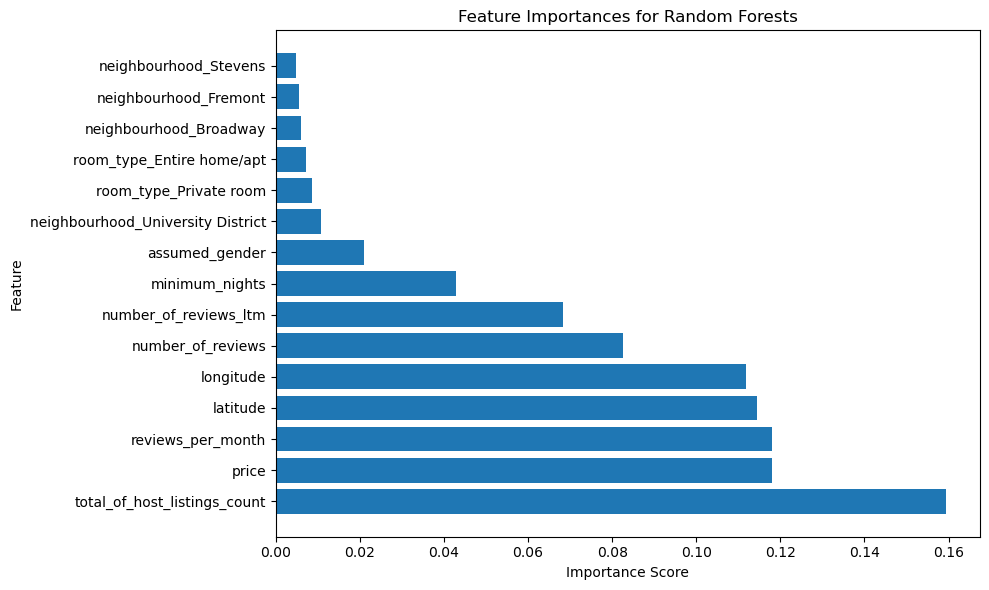

In [12]:
# Plot the feature importances
plt.figure(figsize = (10, 6))
plt.barh(feature_importances_RF["Feature"].head(15), feature_importances_RF["Random Forest Importances"].head(15))
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances for Random Forests")
plt.tight_layout()
plt.show()

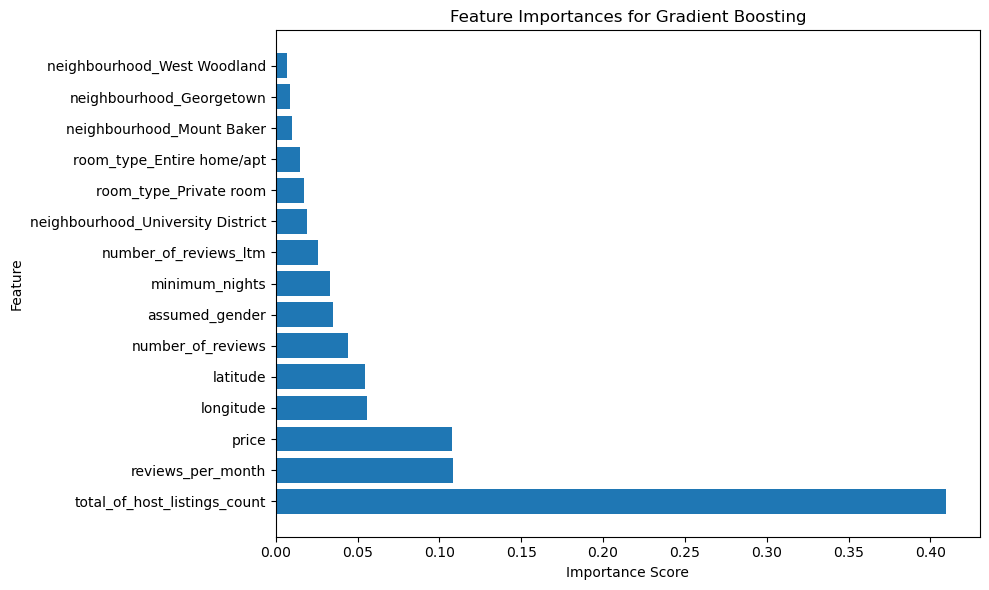

In [13]:
# Plot the feature importances from Gradient Boosting
plt.figure(figsize = (10, 6))
plt.barh(feature_importances_GB["Feature"].head(15), feature_importances_GB["Gradient Boosting Importances"].head(15))
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances for Gradient Boosting")
plt.tight_layout()
plt.show()

**Conclusion:** Based on the feature importance analysis for non-scaled data using Random Forests and Gradient Boosting models, the top features influencing the target variable are:

- total_of_host_listings_count
- reviews_per_month
- price
- latitude
- longitude
- number_of_reviews
- number_of_reviews_ltm
- minimum_nights
- assumed_gender
- neighbourhood_University District

The total number of host listings, reviews per month, and price are consistently identified as the most important features. This suggests that hosts with more listings, higher review activity, and higher prices may have a greater impact on the availability of accommodations. Additionally, the location coordinates (latitude and longitude), as well as the number of reviews and review activity, also play a significant role in determining availability patterns.

But, it's important to note that these findings are based on the specific dataset and models used. Feature importance analysis provides insights into the relative importance of features but does not establish causation. Additionally, scaling the data may affect the feature importance scores.

In conclusion, the feature importance analysis on non-scaled data suggests that the total number of host listings, reviews per month, price, location coordinates, review-related metrics, and certain neighborhood characteristics, along with the assumed gender and room type, contribute significantly to the prediction of availability patterns. 

#### Scaled Data

In [14]:
# drop neighbourhood_group columns in order not to reapeate it in the feature importance 
scaled_clean_data.drop(columns = neighbourhood_group_cols, inplace = True)

# for clean scaled data and all columns
# drop 'name_processed' since it is text data
# drop 'longitude' and 'latitude' 
# since after scalling I created a new column called location_proximity using these two columns as a base
X = scaled_clean_data.drop(['availability_365', 'name_processed', 'longitude', 'latitude'], axis = 1)
y = scaled_clean_data['availability_365']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# Random Forests model
rf_scaled = RandomForestRegressor()
rf_scaled.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
# Gradient Boosting model
gb_scaled = GradientBoostingRegressor()
gb_scaled.fit(X_train, y_train)

GradientBoostingRegressor()

In [18]:
# Get feature importances from both models
rf_importances_scaled = rf_scaled.feature_importances_
gb_importances_scaled = gb_scaled.feature_importances_

In [19]:
# Create a DataFrame to store the feature importances
feature_importances_scaled = pd.DataFrame({"Feature": X.columns,
                                           "Random Forest Importances": rf_importances_scaled,
                                           "Gradient Boosting Importances": gb_importances_scaled})

In [20]:
# Sort the DataFrame by Random Forest Importance scores
feature_importances_RF_scaled = feature_importances_scaled

feature_importances_RF_scaled = feature_importances_RF_scaled.sort_values(by = "Random Forest Importances", ascending = False)

feature_importances_RF_scaled.drop(['Gradient Boosting Importances'], axis = 1).head(15)

,Feature,Random Forest Importances
6,total_of_host_listings_count,0.158134
97,location_proximity,0.139947
3,reviews_per_month,0.127648
2,number_of_reviews,0.088961
4,number_of_reviews_ltm,0.073160
0,price,0.067926
98,price_log,0.066484
1,minimum_nights,0.044866
5,assumed_gender,0.023598
86,neighbourhood_University District,0.010792


In [21]:
# Sort the DataFrame by Gradient Boosting Importance scores
feature_importances_GB_scaled = feature_importances_scaled

feature_importances_GB_scaled = feature_importances_GB_scaled.sort_values(by = "Gradient Boosting Importances", ascending = False)

feature_importances_GB_scaled.drop(['Random Forest Importances'], axis = 1).head(15)

,Feature,Gradient Boosting Importances
6,total_of_host_listings_count,0.422065
3,reviews_per_month,0.106014
97,location_proximity,0.073138
0,price,0.055547
98,price_log,0.053638
2,number_of_reviews,0.043534
1,minimum_nights,0.033545
5,assumed_gender,0.033485
8,room_type_Private room,0.024628
4,number_of_reviews_ltm,0.023818


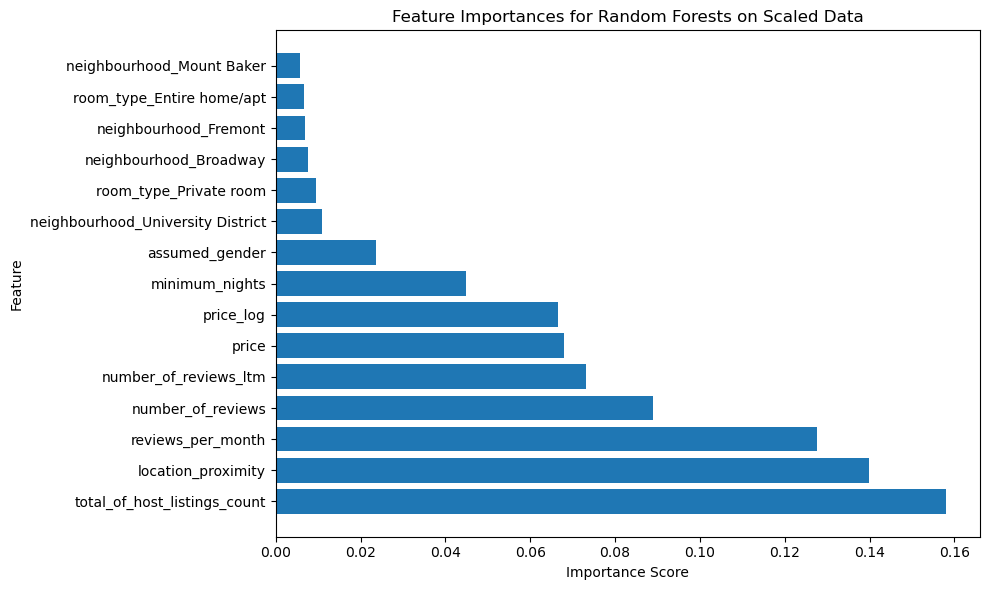

In [22]:
# Plot the feature importances
plt.figure(figsize = (10, 6))
plt.barh(feature_importances_RF_scaled["Feature"].head(15), feature_importances_RF_scaled["Random Forest Importances"].head(15))
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances for Random Forests on Scaled Data")
plt.tight_layout()
plt.show()

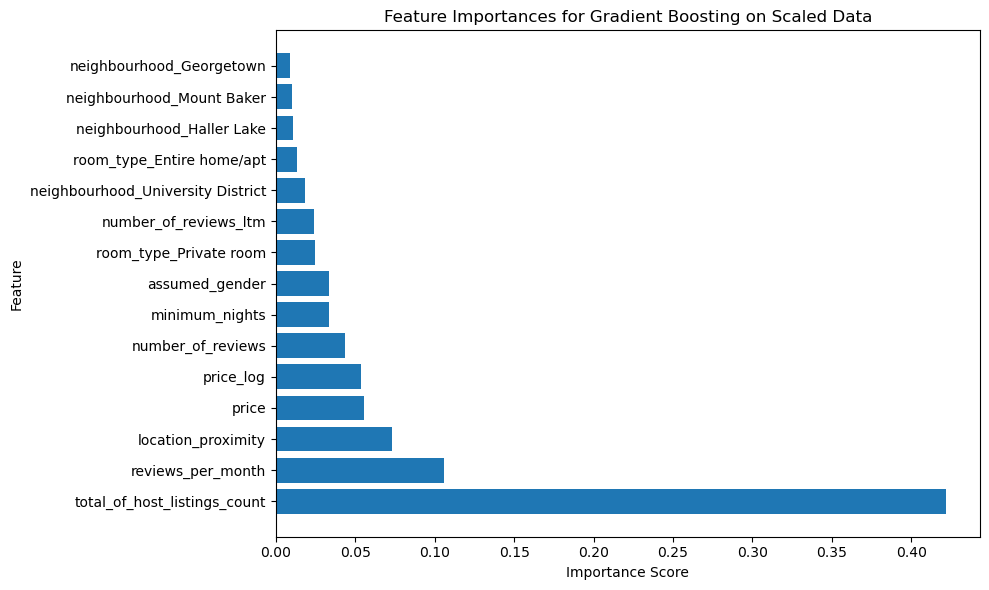

In [23]:
# Plot the feature importances from Gradient Boosting
plt.figure(figsize = (10, 6))
plt.barh(feature_importances_GB_scaled["Feature"].head(15), feature_importances_GB_scaled["Gradient Boosting Importances"].head(15))
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances for Gradient Boosting on Scaled Data")
plt.tight_layout()
plt.show()

**Conclusion for scaled data:** Based on the feature importance analysis for scaled data using both Random Forests and Gradient Boosting models, the top features influencing the target variable are:

Random Forest Importances:

1. The most important features, in descending order, are:
- total_of_host_listings_count
- location_proximity
- reviews_per_month
- number_of_reviews
- number_of_reviews_ltm

2. Other important features include:
- price
- price_log
- minimum_nights
- assumed_gender
- neighbourhood_University District

3. The room type, specifically Private room and Entire home/apt, as well as certain neighborhoods like Broadway and Fremont, also contribute to the model's prediction.

Gradient Boosting Importances:

1. The top features, in descending order of importance, are:
- total_of_host_listings_count
- reviews_per_month
- location_proximity
- price_log
- price

2. Additional features that influence the model's prediction are:
- number_of_reviews
- assumed_gender
- minimum_nights
- room_type_Private room
- number_of_reviews_ltm

3. The neighbourhood_University District is also found to be important in predicting availability patterns.

Note that their order is different between two models where for non scaled data it was simmilar.

These findings indicate that features related to the number of host listings, review activity, location proximity, pricing, and other factors such as room type and neighborhood play a significant role in predicting availability patterns.

In conclusion, based on the feature importance analysis on scaled data, the total number of host listings, review-related metrics, location proximity, pricing, and other factors like assumed gender, room type, and specific neighborhoods are important factors in predicting availability patterns.

## Conclusion

In [24]:
# Add a column for the sum of importances
feature_importances["Total Importances"] = \
feature_importances["Random Forest Importances"] + feature_importances["Gradient Boosting Importances"]

feature_importances = feature_importances.sort_values(by = "Total Importances", ascending = False)

feature_importances.drop(['Random Forest Importances', 'Gradient Boosting Importances'], axis = 1).head(15)

,Feature,Total Importances
8,total_of_host_listings_count,0.569333
5,reviews_per_month,0.226398
2,price,0.225848
0,latitude,0.169222
1,longitude,0.167582
4,number_of_reviews,0.126674
6,number_of_reviews_ltm,0.093939
3,minimum_nights,0.075828
7,assumed_gender,0.056009
88,neighbourhood_University District,0.029971


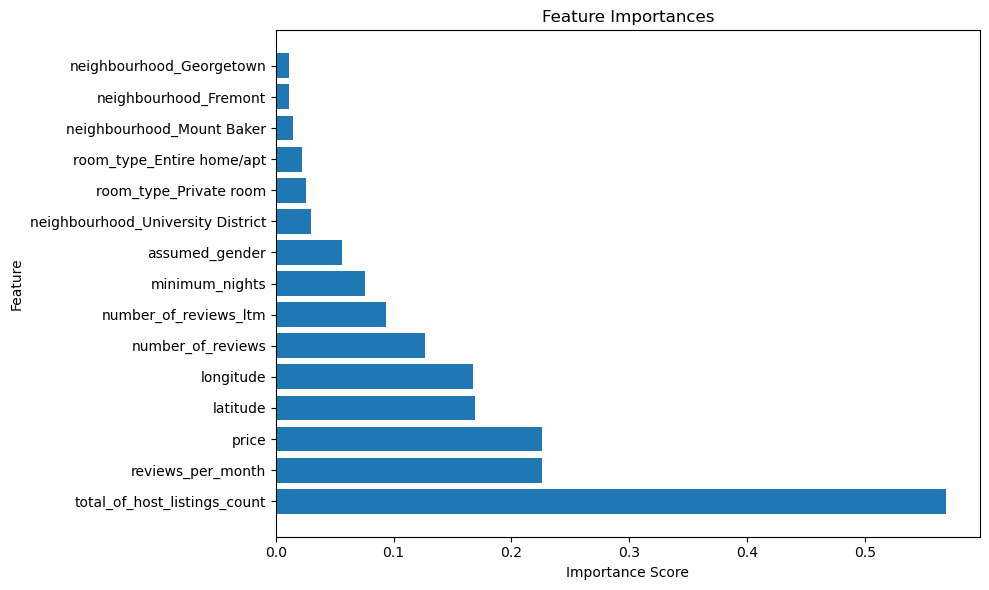

In [25]:
plt.figure(figsize = (10, 6))
plt.barh(feature_importances["Feature"].head(15), feature_importances["Total Importances"].head(15))
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [26]:
# Add a column for the sum of importances for scaled data
feature_importances_scaled["Total Importances"] = \
feature_importances_scaled["Random Forest Importances"] + feature_importances["Gradient Boosting Importances"]

feature_importances_scaled = feature_importances_scaled.sort_values(by = "Total Importances", ascending = False)

feature_importances_scaled.drop(['Random Forest Importances', 'Gradient Boosting Importances'], axis = 1).head(15)

,Feature,Total Importances
8,room_type_Private room,0.419271
2,number_of_reviews,0.196772
6,total_of_host_listings_count,0.183728
3,reviews_per_month,0.160519
97,location_proximity,0.140190
5,assumed_gender,0.132041
0,price,0.122708
4,number_of_reviews_ltm,0.117170
1,minimum_nights,0.100594
98,price_log,0.066484


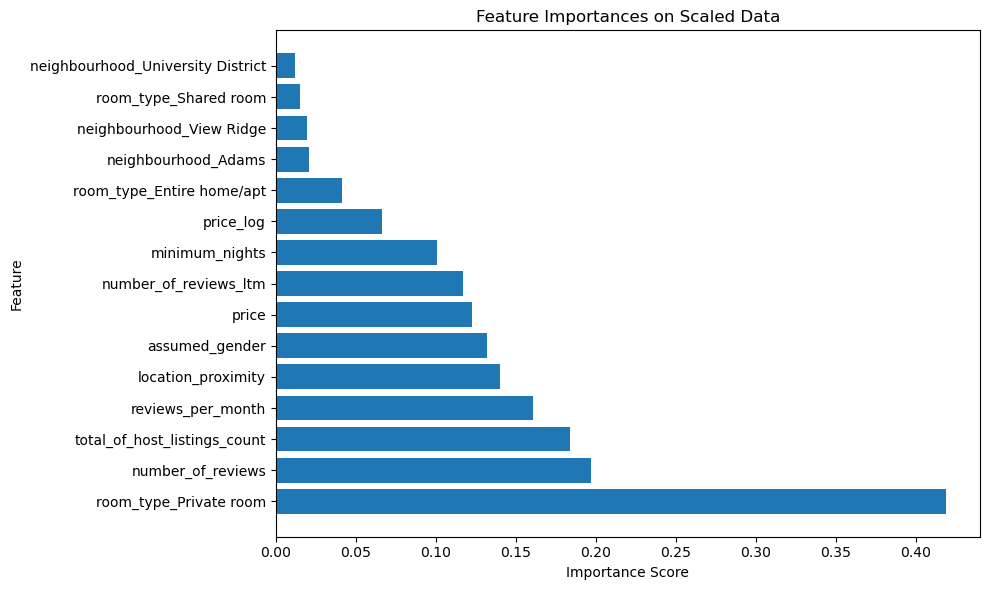

In [27]:
plt.figure(figsize = (10, 6))
plt.barh(feature_importances_scaled["Feature"].head(15), feature_importances_scaled["Total Importances"].head(15))
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances on Scaled Data")
plt.tight_layout()
plt.show()

Based on the feature importance analysis for non-scaled and scaled data, the top features influencing the target variable are as follows:

**Non-Scaled Data:**

1. The most important features, based on their total importances in descending order, are:
- total_of_host_listings_count
- reviews_per_month
- price
- latitude
- longitude

2. Other important features include:
- number_of_reviews
- number_of_reviews_ltm
- minimum_nights
- assumed_gender
- neighbourhood_University District

3. The room type, specifically Entire home/apt and Private room, as well as certain neighborhoods such as Mount Baker, Fremont, and Georgetown, also contribute to the prediction of availability patterns.

**Scaled Data:**

1. The most important features, based on their total importances in descending order, are:
- room_type_Private room
- number_of_reviews
- total_of_host_listings_count
- reviews_per_month
- location_proximity

2. Additional important features include:
- assumed_gender
- price
- number_of_reviews_ltm
- minimum_nights
- price_log

3. The neighbourhood_University District, along with other specific neighborhoods like View Ridge and Adams, also play a role in predicting availability patterns.

It's important to note that the order of importance may vary between the non-scaled and scaled data analyses. Scaling the data can influence the feature importance scores.

In conclusion, the feature importance analysis reveals that the total number of host listings, review-related metrics, price, location factors, room type, and certain neighborhood characteristics contribute significantly to the prediction of availability patterns. 